# **EDA of new extraction of PubChemQC**

**Responsible** for the extraction: Vinicius Ávila

**Version**: v2

**Date of extraction**: `April 2023`

**Objective**: Make an exploratory data analysis (EDA) of the data

**Details**: available at the README file

# Importing libraries and configuration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from rdkit import Chem
import matplotlib.pyplot as plt

In [2]:
tqdm.pandas()

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
sns.set_theme(style="darkgrid", palette="husl", rc={"figure.figsize":(10, 5)})

# Loading data

In [5]:
df_smiles_1 = pd.read_parquet("smiles_list.parquet")

In [6]:
df_smiles_2 = pd.read_parquet("pubchem_smiles.parquet")

In [7]:
df_properties = pd.read_parquet("qm_properties.parquet")

In [8]:
df_transitions = pd.read_parquet("transitions_energies.parquet")

# EDA

## Df smiles

In [9]:
df_smiles_1 = df_smiles_1.reset_index()
df_smiles_1

,cid,smiles,smiles source,tanimoto
0,1,CC(=O)O[C@@H](CC(=O)[O-])C[N+](C)(C)C,RDKit,1.0
1,2,CC(=O)O[C@@H](CC(=O)O)C[N+](C)(C)C,RDKit,1.0
2,3,O=C(O)C1=CC=C[C@H](O)[C@H]1O,PubChemQC,1.0
3,4,C[C@H](O)CN,PubChemQC,1.0
4,5,NCC(=O)COP(=O)(O)O,PubChemQC,1.0
...,...,...,...,...
3332468,75276555,CN[C@@H](S)N/N=C(/C)c1ccccn1,PubChemQC,1.0
3332469,75277118,C=CCN(/C=C/c1ccccc1Cl)C(C)=O,PubChemQC,1.0
3332470,75277120,C=CCN(/C=C/c1ccccc1C)C(C)=O,PubChemQC,1.0
3332471,75277121,COc1ccc(/C=C/N(C)C(C)=O)c(OC)c1,PubChemQC,1.0


In [10]:
df_smiles_2

,cid,canonical smiles,isomeric smiles
0,1,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C
1,2,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,CC(=O)OC(CC(=O)O)C[N+](C)(C)C
2,3,C1=CC(C(C(=C1)C(=O)O)O)O,C1=CC(C(C(=C1)C(=O)O)O)O
3,4,CC(CN)O,CC(CN)O
4,5,C(C(=O)COP(=O)(O)O)N,C(C(=O)COP(=O)(O)O)N
...,...,...,...
3332468,75276555,CC(=NNC(NC)S)C1=CC=CC=N1,CC(=NNC(NC)S)C1=CC=CC=N1
3332469,75277118,CC(=O)N(CC=C)C=CC1=CC=CC=C1Cl,CC(=O)N(CC=C)C=CC1=CC=CC=C1Cl
3332470,75277120,CC1=CC=CC=C1C=CN(CC=C)C(=O)C,CC1=CC=CC=C1C=CN(CC=C)C(=O)C
3332471,75277121,CC(=O)N(C)C=CC1=C(C=C(C=C1)OC)OC,CC(=O)N(C)C=CC1=C(C=C(C=C1)OC)OC


In [11]:
df_smiles_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3332473 entries, 0 to 3332472
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   cid            int64  
 1   smiles         object 
 2   smiles source  object 
 3   tanimoto       float64
dtypes: float64(1), int64(1), object(2)
memory usage: 101.7+ MB


In [12]:
df_smiles_2.isnull().sum()

cid                 0
canonical smiles    0
isomeric smiles     0
dtype: int64

Dataset 1 information (`smiles_list`)

In [13]:
df_smiles_1['cid'].duplicated().sum()

0

In [14]:
df_smiles_1['smiles'].duplicated().sum()

170459

In [15]:
df_smiles_1['smiles source'].value_counts()

smiles source
PubChemQC    2365703
RDKit         966770
Name: count, dtype: int64

Dataset 2 information (`pubchem_smiles`)

In [16]:
df_smiles_2['cid'].duplicated().sum()

0

In [17]:
df_smiles_2['canonical smiles'].duplicated().sum()

306339

In [18]:
df_smiles_2['isomeric smiles'].duplicated().sum()

99

In [19]:
df_smiles_2['isomeric smiles'].value_counts()

isomeric smiles
                                      16
C(=[N+]=[N-])C1=NC(=NC(=N1)Cl)Cl       3
CCN(CC)C(=[N+]=S)C                     2
C(C(C(=O)[O-])[NH3+])C(=O)C=[N+]=N     2
C(CC(=O)C=[N+]=N)C(C(=O)O)N            2
                                      ..
C=CC1=C2C(=CN=C1)C=CC=C2N              1
C1C(=O)NC2=C(O1)C(=CC(=C2)N)Cl         1
CCC1C(OCCN1)(CC)C(=O)N                 1
CCCCOC(=O)N1CC(NC(C1)C)C               1
CC1=CC=C(C=C1)C2C=C3C=NC=CC3=NC2=O     1
Name: count, Length: 3332374, dtype: int64

Let us follow only with the second dataset and use the isomeric smiles

In [20]:
df_smiles_2 = df_smiles_2[['cid', 'isomeric smiles']]

In [21]:
df_smiles_2 = df_smiles_2.rename(columns={'isomeric smiles':'isomeric_smiles'})

## Df properties

In [22]:
df_properties = df_properties.reset_index()

In [23]:
new_col_names = dict(zip(df_properties.columns,["_".join(col.split()) for col in df_properties.columns]))
new_col_names

{'cid': 'cid',
 'charge': 'charge',
 'total dipole moment': 'total_dipole_moment',
 'multiplicity': 'multiplicity',
 'homo': 'homo',
 'lumo': 'lumo',
 'gap': 'gap',
 'total energy': 'total_energy'}

In [24]:
df_properties = df_properties.rename(columns=new_col_names)

In [25]:
df_properties.head()

,cid,charge,total_dipole_moment,multiplicity,homo,lumo,gap,total_energy
0,1,0,12.362788,1,-4.655868,-0.302046,4.353822,-19287.579176
1,2,1,5.855433,1,-11.066870,-3.551086,7.515785,-19299.202955
2,3,0,5.266252,1,-6.821894,-2.239497,4.582397,-15575.874068
3,4,0,2.681395,1,-6.187869,1.847653,8.035522,-6794.535860
4,5,0,8.447997,1,-7.270882,-1.529280,5.741602,-24256.843704


In [26]:
df_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3332473 entries, 0 to 3332472
Data columns (total 8 columns):
 #   Column               Dtype  
---  ------               -----  
 0   cid                  int64  
 1   charge               int64  
 2   total_dipole_moment  float64
 3   multiplicity         int64  
 4   homo                 float64
 5   lumo                 float64
 6   gap                  float64
 7   total_energy         float64
dtypes: float64(5), int64(3)
memory usage: 203.4 MB


In [27]:
df_properties.isnull().sum()

cid                    0
charge                 0
total_dipole_moment    0
multiplicity           0
homo                   0
lumo                   0
gap                    0
total_energy           0
dtype: int64

<Axes: title={'center': 'total_energy'}, ylabel='Frequency'>

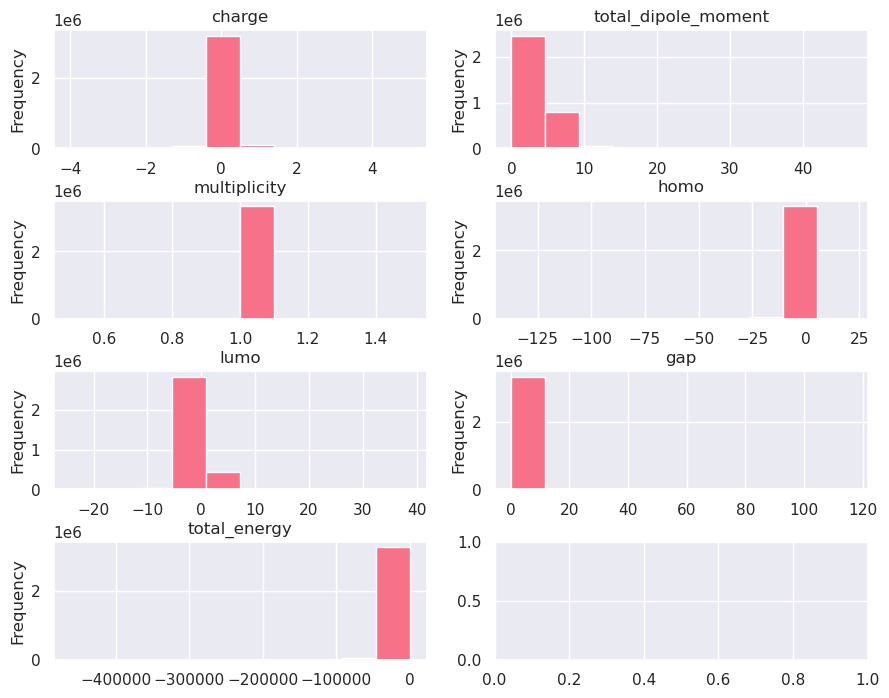

In [28]:
# PLOTS - Properties
fig, axs = plt.subplots(4,2, figsize=(9,7))
fig.tight_layout()

df_properties['charge'].plot.hist( ax=axs[0,0], title='charge')
df_properties['total_dipole_moment'].plot.hist( ax=axs[0,1], title='total_dipole_moment')
df_properties['multiplicity'].plot.hist( ax=axs[1,0], title='multiplicity')
df_properties['homo'].plot.hist( ax=axs[1,1], title='homo')
df_properties['lumo'].plot.hist( ax=axs[2,0], title='lumo')
df_properties['gap'].plot.hist( ax=axs[2,1], title='gap')
df_properties['total_energy'].plot.hist( ax=axs[3,0], title='total_energy')

## Df transitions

In [29]:
df_transitions.head()

,TD_ET_00,TD_OS_00,TD_ET_01,TD_OS_01,TD_ET_02,TD_OS_02,TD_ET_03,TD_OS_03,TD_ET_04,TD_OS_04,TD_ET_05,TD_OS_05,TD_ET_06,TD_OS_06,TD_ET_07,TD_OS_07,TD_ET_08,TD_OS_08,TD_ET_09,TD_OS_09
cid,,,,,,,,,,,,,,,,,,,,
1,32381.393970,0.002393,33414.775701,0.002229,35041.644378,0.000038,35966.609062,0.004932,37121.320776,0.000746,37641.451596,0.006370,37976.268471,0.001117,38311.230525,0.001396,40062.494092,0.003212,40525.343416,0.002180
2,46441.291104,0.000402,46825.670748,0.000412,56096.054110,0.000646,56938.129196,0.022929,57372.999148,0.000343,58598.534406,0.005652,59362.010763,0.005563,60451.940025,0.002308,62136.396688,0.025338,62379.605110,0.017436
3,32576.410766,0.053438,34937.703709,0.127298,35191.469929,0.035610,38959.724483,0.045520,45869.452080,0.002901,46837.502902,0.004995,48214.775245,0.008408,48851.170886,0.003279,50890.898644,0.046370,51729.941085,0.009966
4,45133.600212,0.003867,50498.445390,0.022722,52102.569231,0.001101,53565.199229,0.044094,54291.396641,0.024346,58571.208342,0.009868,60147.530252,0.014954,60319.624771,0.008397,60994.089781,0.004093,62458.026397,0.000847
5,34507.648887,0.001015,41628.443712,0.008713,45462.755074,0.001559,46943.403498,0.000598,48366.754296,0.003638,50735.499802,0.000874,53071.087855,0.009599,54805.905776,0.025285,54979.815042,0.000488,55740.210361,0.013173


In [30]:
df_transitions.describe()

,TD_ET_00,TD_OS_00,TD_ET_01,TD_OS_01,TD_ET_02,TD_OS_02,TD_ET_03,TD_OS_03,TD_ET_04,TD_OS_04,TD_ET_05,TD_OS_05,TD_ET_06,TD_OS_06,TD_ET_07,TD_OS_07,TD_ET_08,TD_OS_08,TD_ET_09,TD_OS_09
count,3.332473e+06,3.332471e+06,3.332469e+06,3.332467e+06,3.332469e+06,3.332467e+06,3.332465e+06,3.332463e+06,3.332461e+06,3.332460e+06,3.332453e+06,3.332453e+06,3.332450e+06,3.332450e+06,3.332450e+06,3.332450e+06,3.332449e+06,3.332449e+06,3.332433e+06,3.332433e+06
mean,3.681991e+04,4.203261e-02,3.987433e+04,4.170425e-02,4.194955e+04,3.427862e-02,4.356640e+04,3.181758e-02,4.495378e+04,3.204932e-02,4.610204e+04,3.176239e-02,4.710332e+04,3.099274e-02,4.798180e+04,3.007061e-02,4.878026e+04,2.908603e-02,4.951528e+04,2.888469e-02
std,7.181669e+03,9.603710e-02,6.649839e+03,8.954339e-02,6.323769e+03,7.122705e-02,6.063943e+03,6.616852e-02,5.887980e+03,6.719373e-02,5.755580e+03,6.860615e-02,5.656041e+03,6.917334e-02,5.585533e+03,6.523123e-02,5.533867e+03,6.218902e-02,5.493351e+03,6.104075e-02
min,1.209832e-01,0.000000e+00,1.935731e-01,0.000000e+00,4.516705e-01,0.000000e+00,6.129814e-01,0.000000e+00,7.097679e-01,0.000000e+00,9.356031e-01,0.000000e+00,6.667753e+03,0.000000e+00,6.811909e+03,0.000000e+00,6.853430e+03,0.000000e+00,7.659549e+03,0.000000e+00
25%,3.260110e+04,1.748000e-03,3.590748e+04,2.559000e-03,3.822720e+04,2.727000e-03,4.005465e+04,2.878000e-03,4.153479e+04,3.068000e-03,4.273137e+04,3.195000e-03,4.376980e+04,3.285000e-03,4.468988e+04,3.366000e-03,4.550582e+04,3.398000e-03,4.623885e+04,3.455000e-03
50%,3.735943e+04,8.265000e-03,4.000337e+04,9.339000e-03,4.198047e+04,9.232000e-03,4.348659e+04,9.395000e-03,4.477994e+04,9.612000e-03,4.584361e+04,9.637000e-03,4.676952e+04,9.618000e-03,4.759701e+04,9.649000e-03,4.835811e+04,9.575000e-03,4.906630e+04,9.627000e-03
75%,4.155561e+04,3.818800e-02,4.398318e+04,3.480450e-02,4.562976e+04,2.978200e-02,4.696363e+04,2.867300e-02,4.822472e+04,2.911600e-02,4.927344e+04,2.828300e-02,5.018453e+04,2.718400e-02,5.099737e+04,2.664100e-02,5.173332e+04,2.603100e-02,5.242591e+04,2.594600e-02
max,9.253637e+05,3.136587e+00,9.456788e+05,2.123293e+00,9.456789e+05,2.055379e+00,9.456789e+05,2.854406e+00,1.037680e+06,2.505091e+00,1.041635e+06,2.694796e+00,1.041635e+06,3.752968e+00,1.041635e+06,2.698749e+00,1.074186e+06,3.395974e+00,1.074186e+06,2.360181e+00


<Axes: title={'center': 'Mean Transition Energies'}>

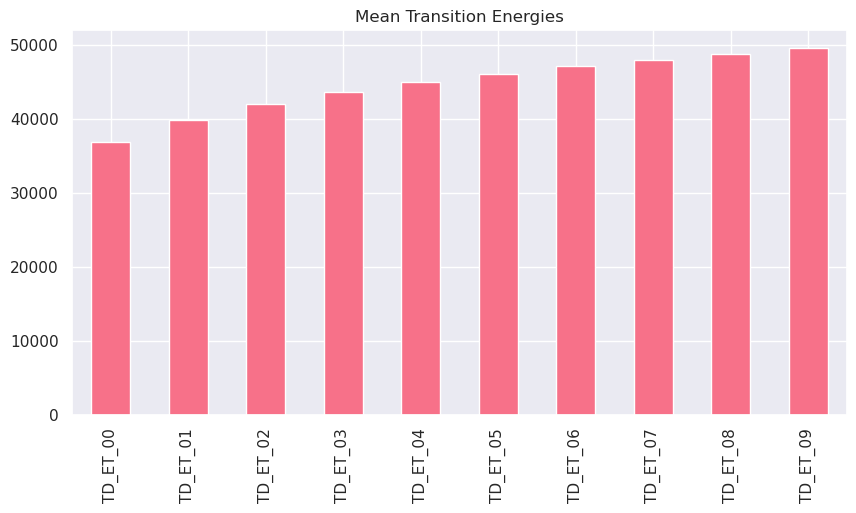

In [31]:
df_transitions[[x for x in df_transitions.columns if 'ET' in x]].describe().T['mean'].plot.bar(title='Mean Transition Energies')

<Axes: title={'center': 'Mean Oscillation Frequencies'}>

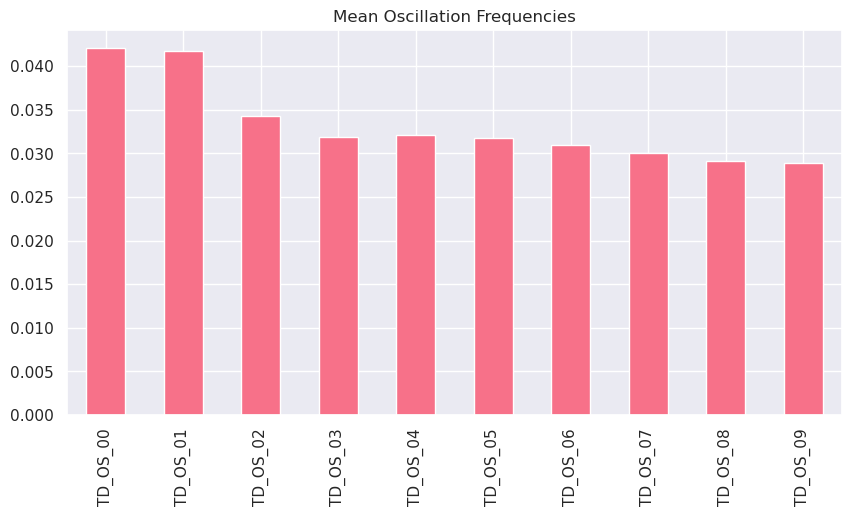

In [32]:
df_transitions[[x for x in df_transitions.columns if 'OS' in x]].describe().T['mean'].plot.bar(title='Mean Oscillation Frequencies')

In [33]:
df_transitions = df_transitions.reset_index()

In [34]:
df_transitions.shape

(3332473, 21)

In [35]:
df_transitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3332473 entries, 0 to 3332472
Data columns (total 21 columns):
 #   Column    Dtype  
---  ------    -----  
 0   cid       int64  
 1   TD_ET_00  float64
 2   TD_OS_00  float64
 3   TD_ET_01  float64
 4   TD_OS_01  float64
 5   TD_ET_02  float64
 6   TD_OS_02  float64
 7   TD_ET_03  float64
 8   TD_OS_03  float64
 9   TD_ET_04  float64
 10  TD_OS_04  float64
 11  TD_ET_05  float64
 12  TD_OS_05  float64
 13  TD_ET_06  float64
 14  TD_OS_06  float64
 15  TD_ET_07  float64
 16  TD_OS_07  float64
 17  TD_ET_08  float64
 18  TD_OS_08  float64
 19  TD_ET_09  float64
 20  TD_OS_09  float64
dtypes: float64(20), int64(1)
memory usage: 533.9 MB


In [36]:
df_transitions.isnull().sum()

cid          0
TD_ET_00     0
TD_OS_00     2
TD_ET_01     4
TD_OS_01     6
TD_ET_02     4
TD_OS_02     6
TD_ET_03     8
TD_OS_03    10
TD_ET_04    12
TD_OS_04    13
TD_ET_05    20
TD_OS_05    20
TD_ET_06    23
TD_OS_06    23
TD_ET_07    23
TD_OS_07    23
TD_ET_08    24
TD_OS_08    24
TD_ET_09    40
TD_OS_09    40
dtype: int64

<Axes: title={'center': 'TD_ET_09'}, ylabel='Frequency'>

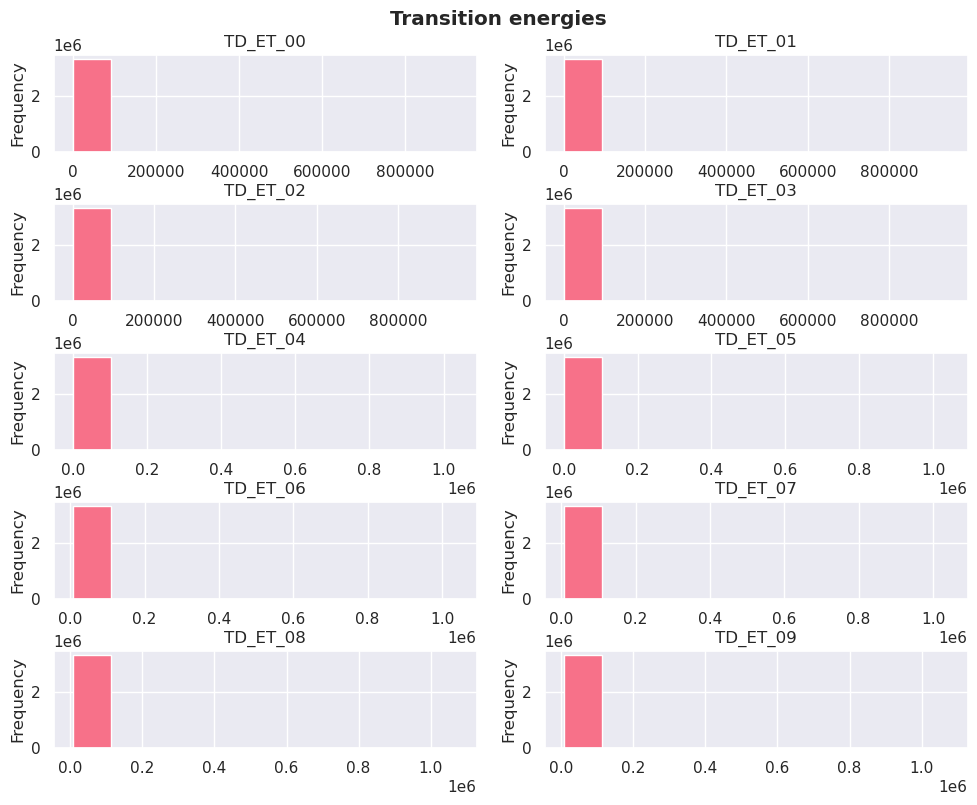

In [37]:
# PLOTS - Excitation energies
fig, axs = plt.subplots(5,2, figsize=(10,8))
fig.suptitle('Transition energies', weight ='bold')
fig.tight_layout()

df_transitions['TD_ET_00'].plot.hist(title='TD_ET_00', ax=axs[0,0])
df_transitions['TD_ET_01'].plot.hist(title='TD_ET_01', ax=axs[0,1])
df_transitions['TD_ET_02'].plot.hist(title='TD_ET_02', ax=axs[1,0])
df_transitions['TD_ET_03'].plot.hist(title='TD_ET_03', ax=axs[1,1])
df_transitions['TD_ET_04'].plot.hist(title='TD_ET_04', ax=axs[2,0])
df_transitions['TD_ET_05'].plot.hist(title='TD_ET_05', ax=axs[2,1])
df_transitions['TD_ET_06'].plot.hist(title='TD_ET_06', ax=axs[3,0])
df_transitions['TD_ET_07'].plot.hist(title='TD_ET_07', ax=axs[3,1])
df_transitions['TD_ET_08'].plot.hist(title='TD_ET_08', ax=axs[4,0])
df_transitions['TD_ET_09'].plot.hist(title='TD_ET_09', ax=axs[4,1])

<Axes: title={'center': 'TD_OS_09'}, ylabel='Frequency'>

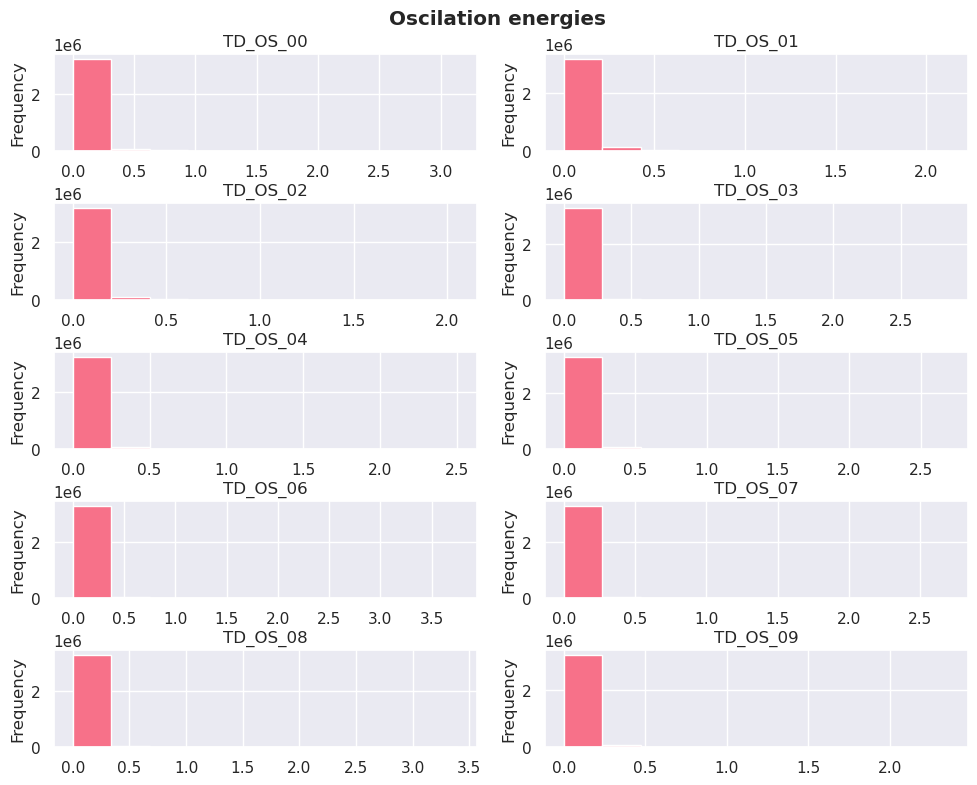

In [38]:
# PLOTS - Oscillator forces
fig, axs = plt.subplots(5,2, figsize=(10,8))
fig.suptitle('Oscilation energies', weight ='bold')
fig.tight_layout()

df_transitions['TD_OS_00'].plot.hist(title='TD_OS_00', ax=axs[0,0])
df_transitions['TD_OS_01'].plot.hist(title='TD_OS_01', ax=axs[0,1])
df_transitions['TD_OS_02'].plot.hist(title='TD_OS_02', ax=axs[1,0])
df_transitions['TD_OS_03'].plot.hist(title='TD_OS_03', ax=axs[1,1])
df_transitions['TD_OS_04'].plot.hist(title='TD_OS_04', ax=axs[2,0])
df_transitions['TD_OS_05'].plot.hist(title='TD_OS_05', ax=axs[2,1])
df_transitions['TD_OS_06'].plot.hist(title='TD_OS_06', ax=axs[3,0])
df_transitions['TD_OS_07'].plot.hist(title='TD_OS_07', ax=axs[3,1])
df_transitions['TD_OS_08'].plot.hist(title='TD_OS_08', ax=axs[4,0])
df_transitions['TD_OS_09'].plot.hist(title='TD_OS_09', ax=axs[4,1])

# Joining datasets 

per cid index

In [39]:
df_smiles_2 = df_smiles_2.set_index('cid')
df_properties = df_properties.set_index('cid')
df_transitions = df_transitions.set_index('cid')
#df_geometry = df_geometry.set_index('cid')

In [40]:
joined_df = ( 
    df_smiles_2
    .merge(df_properties, on='cid', how='left')
    .merge(df_transitions, on='cid', how='left')
 )

In [41]:
joined_df.head()

,isomeric_smiles,charge,total_dipole_moment,multiplicity,homo,lumo,gap,total_energy,TD_ET_00,TD_OS_00,TD_ET_01,TD_OS_01,TD_ET_02,TD_OS_02,TD_ET_03,TD_OS_03,TD_ET_04,TD_OS_04,TD_ET_05,TD_OS_05,TD_ET_06,TD_OS_06,TD_ET_07,TD_OS_07,TD_ET_08,TD_OS_08,TD_ET_09,TD_OS_09
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,0,12.362788,1,-4.655868,-0.302046,4.353822,-19287.579176,32381.393970,0.002393,33414.775701,0.002229,35041.644378,0.000038,35966.609062,0.004932,37121.320776,0.000746,37641.451596,0.006370,37976.268471,0.001117,38311.230525,0.001396,40062.494092,0.003212,40525.343416,0.002180
2,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,1,5.855433,1,-11.066870,-3.551086,7.515785,-19299.202955,46441.291104,0.000402,46825.670748,0.000412,56096.054110,0.000646,56938.129196,0.022929,57372.999148,0.000343,58598.534406,0.005652,59362.010763,0.005563,60451.940025,0.002308,62136.396688,0.025338,62379.605110,0.017436
3,C1=CC(C(C(=C1)C(=O)O)O)O,0,5.266252,1,-6.821894,-2.239497,4.582397,-15575.874068,32576.410766,0.053438,34937.703709,0.127298,35191.469929,0.035610,38959.724483,0.045520,45869.452080,0.002901,46837.502902,0.004995,48214.775245,0.008408,48851.170886,0.003279,50890.898644,0.046370,51729.941085,0.009966
4,CC(CN)O,0,2.681395,1,-6.187869,1.847653,8.035522,-6794.535860,45133.600212,0.003867,50498.445390,0.022722,52102.569231,0.001101,53565.199229,0.044094,54291.396641,0.024346,58571.208342,0.009868,60147.530252,0.014954,60319.624771,0.008397,60994.089781,0.004093,62458.026397,0.000847
5,C(C(=O)COP(=O)(O)O)N,0,8.447997,1,-7.270882,-1.529280,5.741602,-24256.843704,34507.648887,0.001015,41628.443712,0.008713,45462.755074,0.001559,46943.403498,0.000598,48366.754296,0.003638,50735.499802,0.000874,53071.087855,0.009599,54805.905776,0.025285,54979.815042,0.000488,55740.210361,0.013173


In [42]:
joined_df.shape

(3332473, 28)

In [43]:
joined_df.isnull().sum()

isomeric_smiles         0
charge                  0
total_dipole_moment     0
multiplicity            0
homo                    0
lumo                    0
gap                     0
total_energy            0
TD_ET_00                0
TD_OS_00                2
TD_ET_01                4
TD_OS_01                6
TD_ET_02                4
TD_OS_02                6
TD_ET_03                8
TD_OS_03               10
TD_ET_04               12
TD_OS_04               13
TD_ET_05               20
TD_OS_05               20
TD_ET_06               23
TD_OS_06               23
TD_ET_07               23
TD_OS_07               23
TD_ET_08               24
TD_OS_08               24
TD_ET_09               40
TD_OS_09               40
dtype: int64

<Axes: xlabel='gap', ylabel='TD_ET_00'>

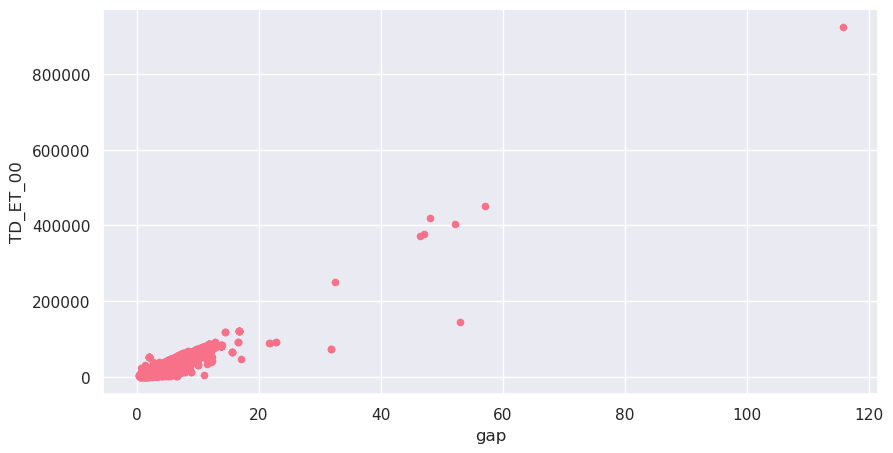

In [44]:
joined_df.plot.scatter(x='gap', y='TD_ET_00')

In [46]:
joined_df_numeric = joined_df[['charge', 'total_dipole_moment', 'multiplicity', 'homo',\
                              'lumo', 'gap', 'total_energy', 'TD_ET_00', 'TD_OS_00', 'TD_ET_01', 'TD_OS_01']]

## Replacing null data for zeros

Probably all the energy data read as null are actually very small numbers, understood as null by Python

In [47]:
joined_df[joined_df['TD_OS_03'].isnull()==True].head()

,isomeric_smiles,charge,total_dipole_moment,multiplicity,homo,lumo,gap,total_energy,TD_ET_00,TD_OS_00,TD_ET_01,TD_OS_01,TD_ET_02,TD_OS_02,TD_ET_03,TD_OS_03,TD_ET_04,TD_OS_04,TD_ET_05,TD_OS_05,TD_ET_06,TD_OS_06,TD_ET_07,TD_OS_07,TD_ET_08,TD_OS_08,TD_ET_09,TD_OS_09
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,
783,[HH],0,0.000015,1,-11.809741,2.723860,14.533601,-31.986504,118961.696985,0.615573,229810.335558,0.0,341111.830246,0.072868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23987,[He],0,0.000000,1,-17.681958,30.471309,48.153267,-79.104829,419631.775116,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24824,[3H][3H],0,0.000015,1,-11.809741,2.723860,14.533601,-31.986504,118954.736420,0.615606,229813.102039,0.0,341084.004118,0.072831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119434,[3HH],0,0.000015,1,-11.809741,2.723860,14.533601,-31.986504,118954.736420,0.615606,229813.102039,0.0,341084.004118,0.072831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20067662,[N-]=S,-1,1.845251,1,3.197338,4.544301,1.346964,-12322.459220,1.137242,NaN,2.250287,NaN,2.903596,NaN,3.524643,NaN,16174.126324,0.016974,16615.206745,0.040282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
nan_dict = {col : {np.nan: int(0)} for col in df_transitions.columns}

In [49]:
joined_df =joined_df.replace(nan_dict)

Checking again the null distribution

In [50]:
joined_df.isnull().sum()

isomeric_smiles        0
charge                 0
total_dipole_moment    0
multiplicity           0
homo                   0
lumo                   0
gap                    0
total_energy           0
TD_ET_00               0
TD_OS_00               0
TD_ET_01               0
TD_OS_01               0
TD_ET_02               0
TD_OS_02               0
TD_ET_03               0
TD_OS_03               0
TD_ET_04               0
TD_OS_04               0
TD_ET_05               0
TD_OS_05               0
TD_ET_06               0
TD_OS_06               0
TD_ET_07               0
TD_OS_07               0
TD_ET_08               0
TD_OS_08               0
TD_ET_09               0
TD_OS_09               0
dtype: int64

# SMILES check

In [51]:
joined_df[joined_df['isomeric_smiles'].duplicated()==True].head()

,isomeric_smiles,charge,total_dipole_moment,multiplicity,homo,lumo,gap,total_energy,TD_ET_00,TD_OS_00,TD_ET_01,TD_OS_01,TD_ET_02,TD_OS_02,TD_ET_03,TD_OS_03,TD_ET_04,TD_OS_04,TD_ET_05,TD_OS_05,TD_ET_06,TD_OS_06,TD_ET_07,TD_OS_07,TD_ET_08,TD_OS_08,TD_ET_09,TD_OS_09
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,
546922,C[N+]1(CC(CC1C(=O)[O-])O)C,0,11.223376,1,-5.662689,0.721102,6.383791,-15101.022213,38446.602621,0.002227,40268.802649,0.003946,42645.315274,0.000799,42969.243664,0.001687,44305.293010,0.009816,44922.516852,0.001645,45310.171107,0.002888,46281.536868,0.000118,46685.846473,0.006776,47056.272725,0.002917
546923,C[N+]1(CC(CC1C(=O)O)O)C,1,8.530120,1,-11.300888,-4.960635,6.340253,-15111.522151,43584.418858,0.000866,44820.971650,0.005086,52324.912091,0.006962,55953.414959,0.003625,57887.782512,0.005562,58197.991411,0.002927,60421.613578,0.001565,61976.876353,0.007394,62403.083910,0.001731,62699.024861,0.051110
5359526,CC1=CC=C(C=C1)S(=O)(=O)N=[N+]=[N-],0,5.825239,1,-7.513063,-1.956499,5.556565,-26768.329221,34062.567956,0.000313,38932.914614,0.032647,39357.976863,0.008240,43113.278154,0.001538,43571.739822,0.042559,44972.805521,0.000633,46042.191842,0.139397,47008.653752,0.000071,49043.517986,0.049460,49234.768172,0.022273
5360026,C(=[N+]=[N-])C1=NC(=NC(=N1)Cl)Cl,0,3.113957,1,-7.107614,-2.492563,4.615051,-36657.047666,24650.214884,0.000025,35400.835327,0.014526,37657.550423,0.000033,37871.650296,0.513534,38245.230176,0.002990,39639.698260,0.031483,40071.108093,0.000491,40683.895886,0.005357,40703.624207,0.003697,42775.783518,0.000012
5483256,CC[Si](CC)(CC)N=[N+]=[N-],0,3.160813,1,-6.898086,-0.019048,6.879038,-18814.537531,40868.782358,0.000150,45526.021204,0.004155,48307.827429,0.000784,49080.425917,0.001695,52468.825597,0.015813,53180.956699,0.000067,53395.000114,0.060446,54190.230519,0.000994,55081.094082,0.001838,55591.554315,0.002039


In [52]:
from rdkit.Chem import Draw
opts = Draw.DrawingOptions()
Draw.SetComicMode(opts)

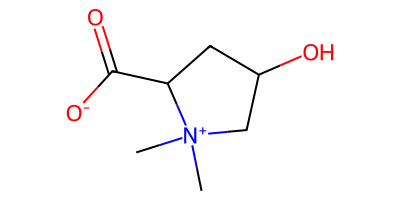

In [53]:
mol1 = Chem.MolFromSmiles('C[N+]1(CC(CC1C(=O)[O-])O)C', sanitize=False)
display(Draw.MolToImage(mol1, size=(400, 200), fitImage=True))

In [54]:
joined_df[joined_df['isomeric_smiles']=='C[N+]1(CC(CC1C(=O)[O-])O)C']

,isomeric_smiles,charge,total_dipole_moment,multiplicity,homo,lumo,gap,total_energy,TD_ET_00,TD_OS_00,TD_ET_01,TD_OS_01,TD_ET_02,TD_OS_02,TD_ET_03,TD_OS_03,TD_ET_04,TD_OS_04,TD_ET_05,TD_OS_05,TD_ET_06,TD_OS_06,TD_ET_07,TD_OS_07,TD_ET_08,TD_OS_08,TD_ET_09,TD_OS_09
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,
457906,C[N+]1(CC(CC1C(=O)[O-])O)C,0,11.182160,1,-5.649084,0.718381,6.367464,-15101.022557,38367.721598,0.002197,40180.718840,0.004154,42560.030209,0.000768,42910.252273,0.001613,44174.29244,0.009324,44867.187218,0.001806,45247.098551,0.002916,46120.476015,0.000178,46630.702346,0.006396,46985.795999,0.003165
546922,C[N+]1(CC(CC1C(=O)[O-])O)C,0,11.223376,1,-5.662689,0.721102,6.383791,-15101.022213,38446.602621,0.002227,40268.802649,0.003946,42645.315274,0.000799,42969.243664,0.001687,44305.29301,0.009816,44922.516852,0.001645,45310.171107,0.002888,46281.536868,0.000118,46685.846473,0.006776,47056.272725,0.002917


Although they are isomers, their properties are not the same, so we will not drop them from the dataset

# Saving

In [55]:
joined_df.to_parquet('joined_data.parquet')